<u><h2><b><center>Spotify's Top Charts Interactive Data Analysis and Song Recommendation System</center></b></h2></u>
<center>by Varun Gupta</center>

![](spotify2.png)

### Introduction

<b><font color=#008000>Spotify Technology S.A. is a Swedish media services provider and music streaming service.Launched on October 2008, the Spotify platform provides access to over 50 million tracks. Users can browse by parameters such as artist, album, or genre, and can create, edit, and share playlists. Spotify is available in most of Europe and the Americas, Australia, New Zealand, and parts of Africa and Asia, and on most modern devices, including Windows, macOS, and Linux computers, and iOS, and Android smartphones and tablets.As of April 2020, the company had 286 million monthly active users, including 130 million paying subscribers.</font></b>

### Exploratory Data Analysis (EDA)

<b><font color=#008000>In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.<br>

Following Libaries have been used analyse the obtained data:</font></b> 
<font color=#008000><ul>
    <li><b>Pandas</b> - For interacting with the csv dataset file and its modifications. </li>
    <li><b>Matplotlib</b> - To generate static graphical representations of data.</li>
    <li><b>Plotly</b> - To generate interactive visualizations which enhances analytical ability. </li>
    <li><b>Wordcloud</b>  - Generates textual graphs in form of wordclouds to understand common terms. </li>
    </ul></font>
    

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
import seaborn as sns

In [5]:
df = pd.read_csv('top10s.csv',encoding='ISO-8859-1')

In [6]:
df.head()

Unnamed: 0                 title      artist        top genre  year  bpm  \
0           1      Hey, Soul Sister       Train       neo mellow  2010   97   
1           2  Love The Way You Lie      Eminem  detroit hip hop  2010   87   
2           3               TiK ToK       Kesha        dance pop  2010  120   
3           4           Bad Romance   Lady Gaga        dance pop  2010  119   
4           5  Just the Way You Are  Bruno Mars              pop  2010  109   

   nrgy  dnce  dB  live  val  dur  acous  spch  pop  
0    89    67  -4     8   80  217     19     4   83  
1    93    75  -5    52   64  263     24    23   82  
2    84    76  -3    29   71  200     10    14   80  
3    92    70  -4     8   71  295      0     4   79  
4    84    64  -5     9   43  221      2     4   78

In [7]:
df = df[df.columns[1:]]

In [8]:
df.head()

title      artist        top genre  year  bpm  nrgy  dnce  \
0      Hey, Soul Sister       Train       neo mellow  2010   97    89    67   
1  Love The Way You Lie      Eminem  detroit hip hop  2010   87    93    75   
2               TiK ToK       Kesha        dance pop  2010  120    84    76   
3           Bad Romance   Lady Gaga        dance pop  2010  119    92    70   
4  Just the Way You Are  Bruno Mars              pop  2010  109    84    64   

   dB  live  val  dur  acous  spch  pop  
0  -4     8   80  217     19     4   83  
1  -5    52   64  263     24    23   82  
2  -3    29   71  200     10    14   80  
3  -4     8   71  295      0     4   79  
4  -5     9   43  221      2     4   78

In [9]:
df.columns = ["Title","Artist","Genre","Year","Beats Per Minute", "Energy","Danceability", "Loudness(dB)","Liveness","Valence",
             'Duration',"Acousticness","Speechiness","Popularity"]

In [10]:
df.head()

Title      Artist            Genre  Year  Beats Per Minute  \
0      Hey, Soul Sister       Train       neo mellow  2010                97   
1  Love The Way You Lie      Eminem  detroit hip hop  2010                87   
2               TiK ToK       Kesha        dance pop  2010               120   
3           Bad Romance   Lady Gaga        dance pop  2010               119   
4  Just the Way You Are  Bruno Mars              pop  2010               109   

   Energy  Danceability  Loudness(dB)  Liveness  Valence  Duration  \
0      89            67            -4         8       80       217   
1      93            75            -5        52       64       263   
2      84            76            -3        29       71       200   
3      92            70            -4         8       71       295   
4      84            64            -5         9       43       221   

   Acousticness  Speechiness  Popularity  
0            19            4          83  
1            24           23          82  
2            10           14          80  
3             0            4          79  
4             2            4          78

In [8]:
df.isnull().sum()

Title               0
Artist              0
Genre               0
Year                0
Beats Per Minute    0
Energy              0
Danceability        0
Loudness(dB)        0
Liveness            0
Valence             0
Duration            0
Acousticness        0
Speechiness         0
Popularity          0
dtype: int64

In [11]:
df.head()

Title      Artist            Genre  Year  Beats Per Minute  \
0      Hey, Soul Sister       Train       neo mellow  2010                97   
1  Love The Way You Lie      Eminem  detroit hip hop  2010                87   
2               TiK ToK       Kesha        dance pop  2010               120   
3           Bad Romance   Lady Gaga        dance pop  2010               119   
4  Just the Way You Are  Bruno Mars              pop  2010               109   

   Energy  Danceability  Loudness(dB)  Liveness  Valence  Duration  \
0      89            67            -4         8       80       217   
1      93            75            -5        52       64       263   
2      84            76            -3        29       71       200   
3      92            70            -4         8       71       295   
4      84            64            -5         9       43       221   

   Acousticness  Speechiness  Popularity  
0            19            4          83  
1            24           23          82  
2            10           14          80  
3             0            4          79  
4             2            4          78

In [10]:
df['Year'].value_counts()

2015    95
2016    80
2013    71
2017    65
2018    64
2014    58
2011    53
2010    51
2012    35
2019    31
Name: Year, dtype: int64

Text(0.5, 1.0, 'Data availability by Year')

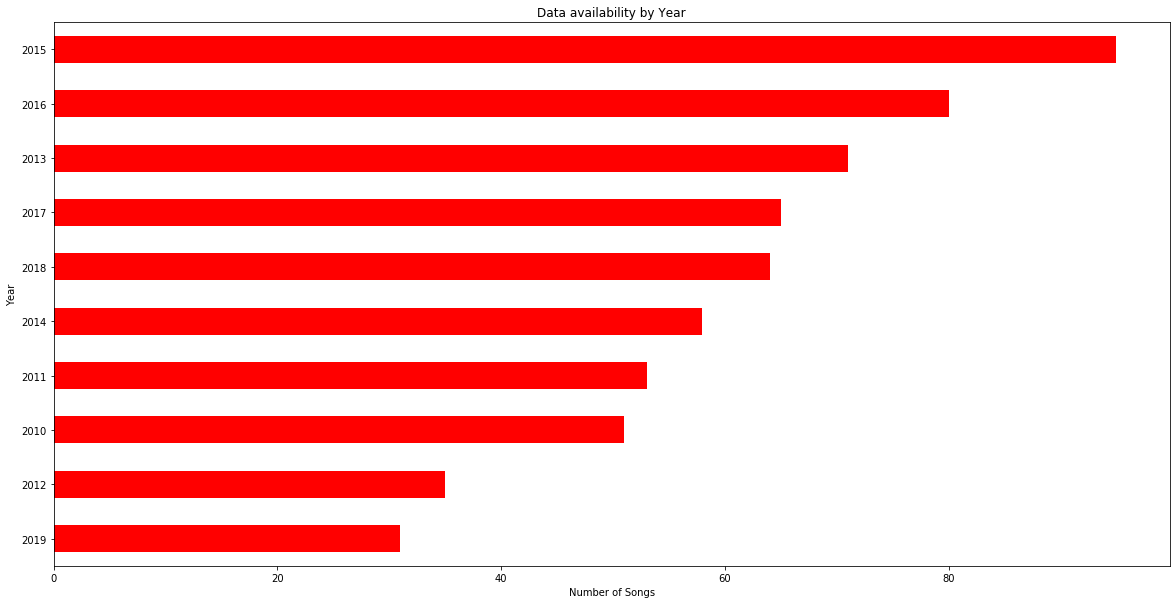

In [11]:
plt.figure(figsize=(20,10))
df.Year.value_counts().sort_values().plot(kind = 'barh',color='red')
plt.xlabel("Number of Songs")
plt.ylabel('Year')
plt.title("Data availability by Year")


In [12]:
df['Genre'].value_counts()

dance pop                    327
pop                           60
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  11
big room                      10
neo mellow                     9
canadian contemporary r&b      9
art pop                        8
complextro                     6
hip pop                        6
australian dance               6
edm                            5
atl hip hop                    5
australian pop                 5
hip hop                        4
permanent wave                 4
latin                          4
colombian pop                  3
tropical house                 3
downtempo                      2
candy pop                      2
acoustic pop                   2
electro                        2
canadian hip hop               2
escape room                    2
electronic trap                2
folk-pop                       2
indie pop 

Text(0.5, 1.0, 'Data availability by Year')

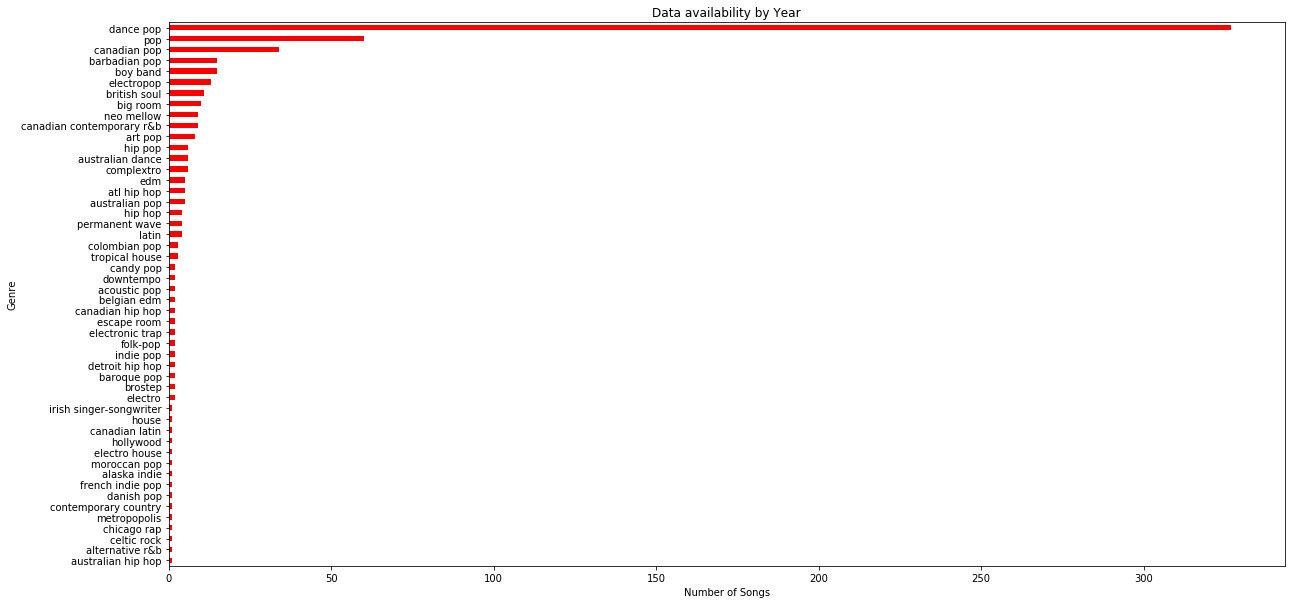

In [13]:
plt.figure(figsize=(20,10))
df.Genre.value_counts().sort_values().plot(kind = 'barh',color='red')
plt.xlabel("Number of Songs")
plt.ylabel('Genre')
plt.title("Data availability by Year")



In [14]:
Genre_counts_index = top.Genre.value_counts().index
fig = go.Figure(
    data = go.Bar( x=Genre_counts_index, y=top.Genre.value_counts()),
    layout = go.Layout(
        title_text = "Number of Tracks by Genre",
        yaxis = dict(title_text="Track Count"),
        xaxis = dict(title_text="Track Genre")
    )
)
fig.show()

NameError: name 'top' is not defined

In [12]:
top = df.sort_values(['Popularity'],ascending=[False])

In [13]:
top.head()

Title         Artist         Genre  Year  Beats Per Minute  \
572             Memories       Maroon 5           pop  2019                91   
573  Lose You To Love Me   Selena Gomez     dance pop  2019               102   
574    Someone You Loved  Lewis Capaldi           pop  2019               110   
575             Señorita   Shawn Mendes  canadian pop  2019               117   
576    How Do You Sleep?      Sam Smith           pop  2019               111   

     Energy  Danceability  Loudness(dB)  Liveness  Valence  Duration  \
572      32            76            -7         8       57       189   
573      34            51            -9        21        9       206   
574      41            50            -6        11       45       182   
575      54            76            -6         9       75       191   
576      68            48            -5         8       35       202   

     Acousticness  Speechiness  Popularity  
572            84            5          99  
573            58            4          97  
574            75            3          96  
575             4            3          95  
576            15            9          93

In [18]:
# Performance of the Top 20 Artists in the past 9 years.

In [14]:
top["Artist"].value_counts().head(20)

Katy Perry           17
Justin Bieber        16
Rihanna              15
Maroon 5             15
Lady Gaga            14
Bruno Mars           13
Shawn Mendes         11
Ed Sheeran           11
Pitbull              11
The Chainsmokers     11
Jennifer Lopez       10
Calvin Harris        10
Adele                10
Kesha                 9
Justin Timberlake     9
Britney Spears        9
Ariana Grande         9
David Guetta          9
OneRepublic           9
Selena Gomez          8
Name: Artist, dtype: int64

In [20]:
fig = px.box(top, x='Artist', y = 'Popularity')
fig.update_layout(title_text = 'Performance of the Top 20 Artists in the Last 9 years', xaxis = dict(tickangle=45))
fig.show()

In [21]:
fig = px.scatter(top, x="Artist",y="Popularity",color = "Genre", hover_name = "Title")
fig.update_layout(
    title_text = "Popularity by Artist and Genre and Song Name",
    xaxis=dict(tickangle=45)
)
fig.show()

In [22]:
fig = px.box(top, x="Genre", y="Popularity")
fig.update_layout(
    title_text = "All Genre Popularity Variations",
    xaxis=dict(tickangle=45)
)
fig.show()

In [23]:
correlation=top.iloc[:,3:].corr(method='pearson')

fig = go.Figure(
    data = [
        go.Heatmap(
            z=correlation, x=correlation.columns, y=correlation.index,
            hoverongaps = False
        )
    ],
    layout = go.Layout(
        title_text = "Correlations of the numeric scores",
        autosize = True,
        width = 650,
        height = 650
    )
)
fig.show()

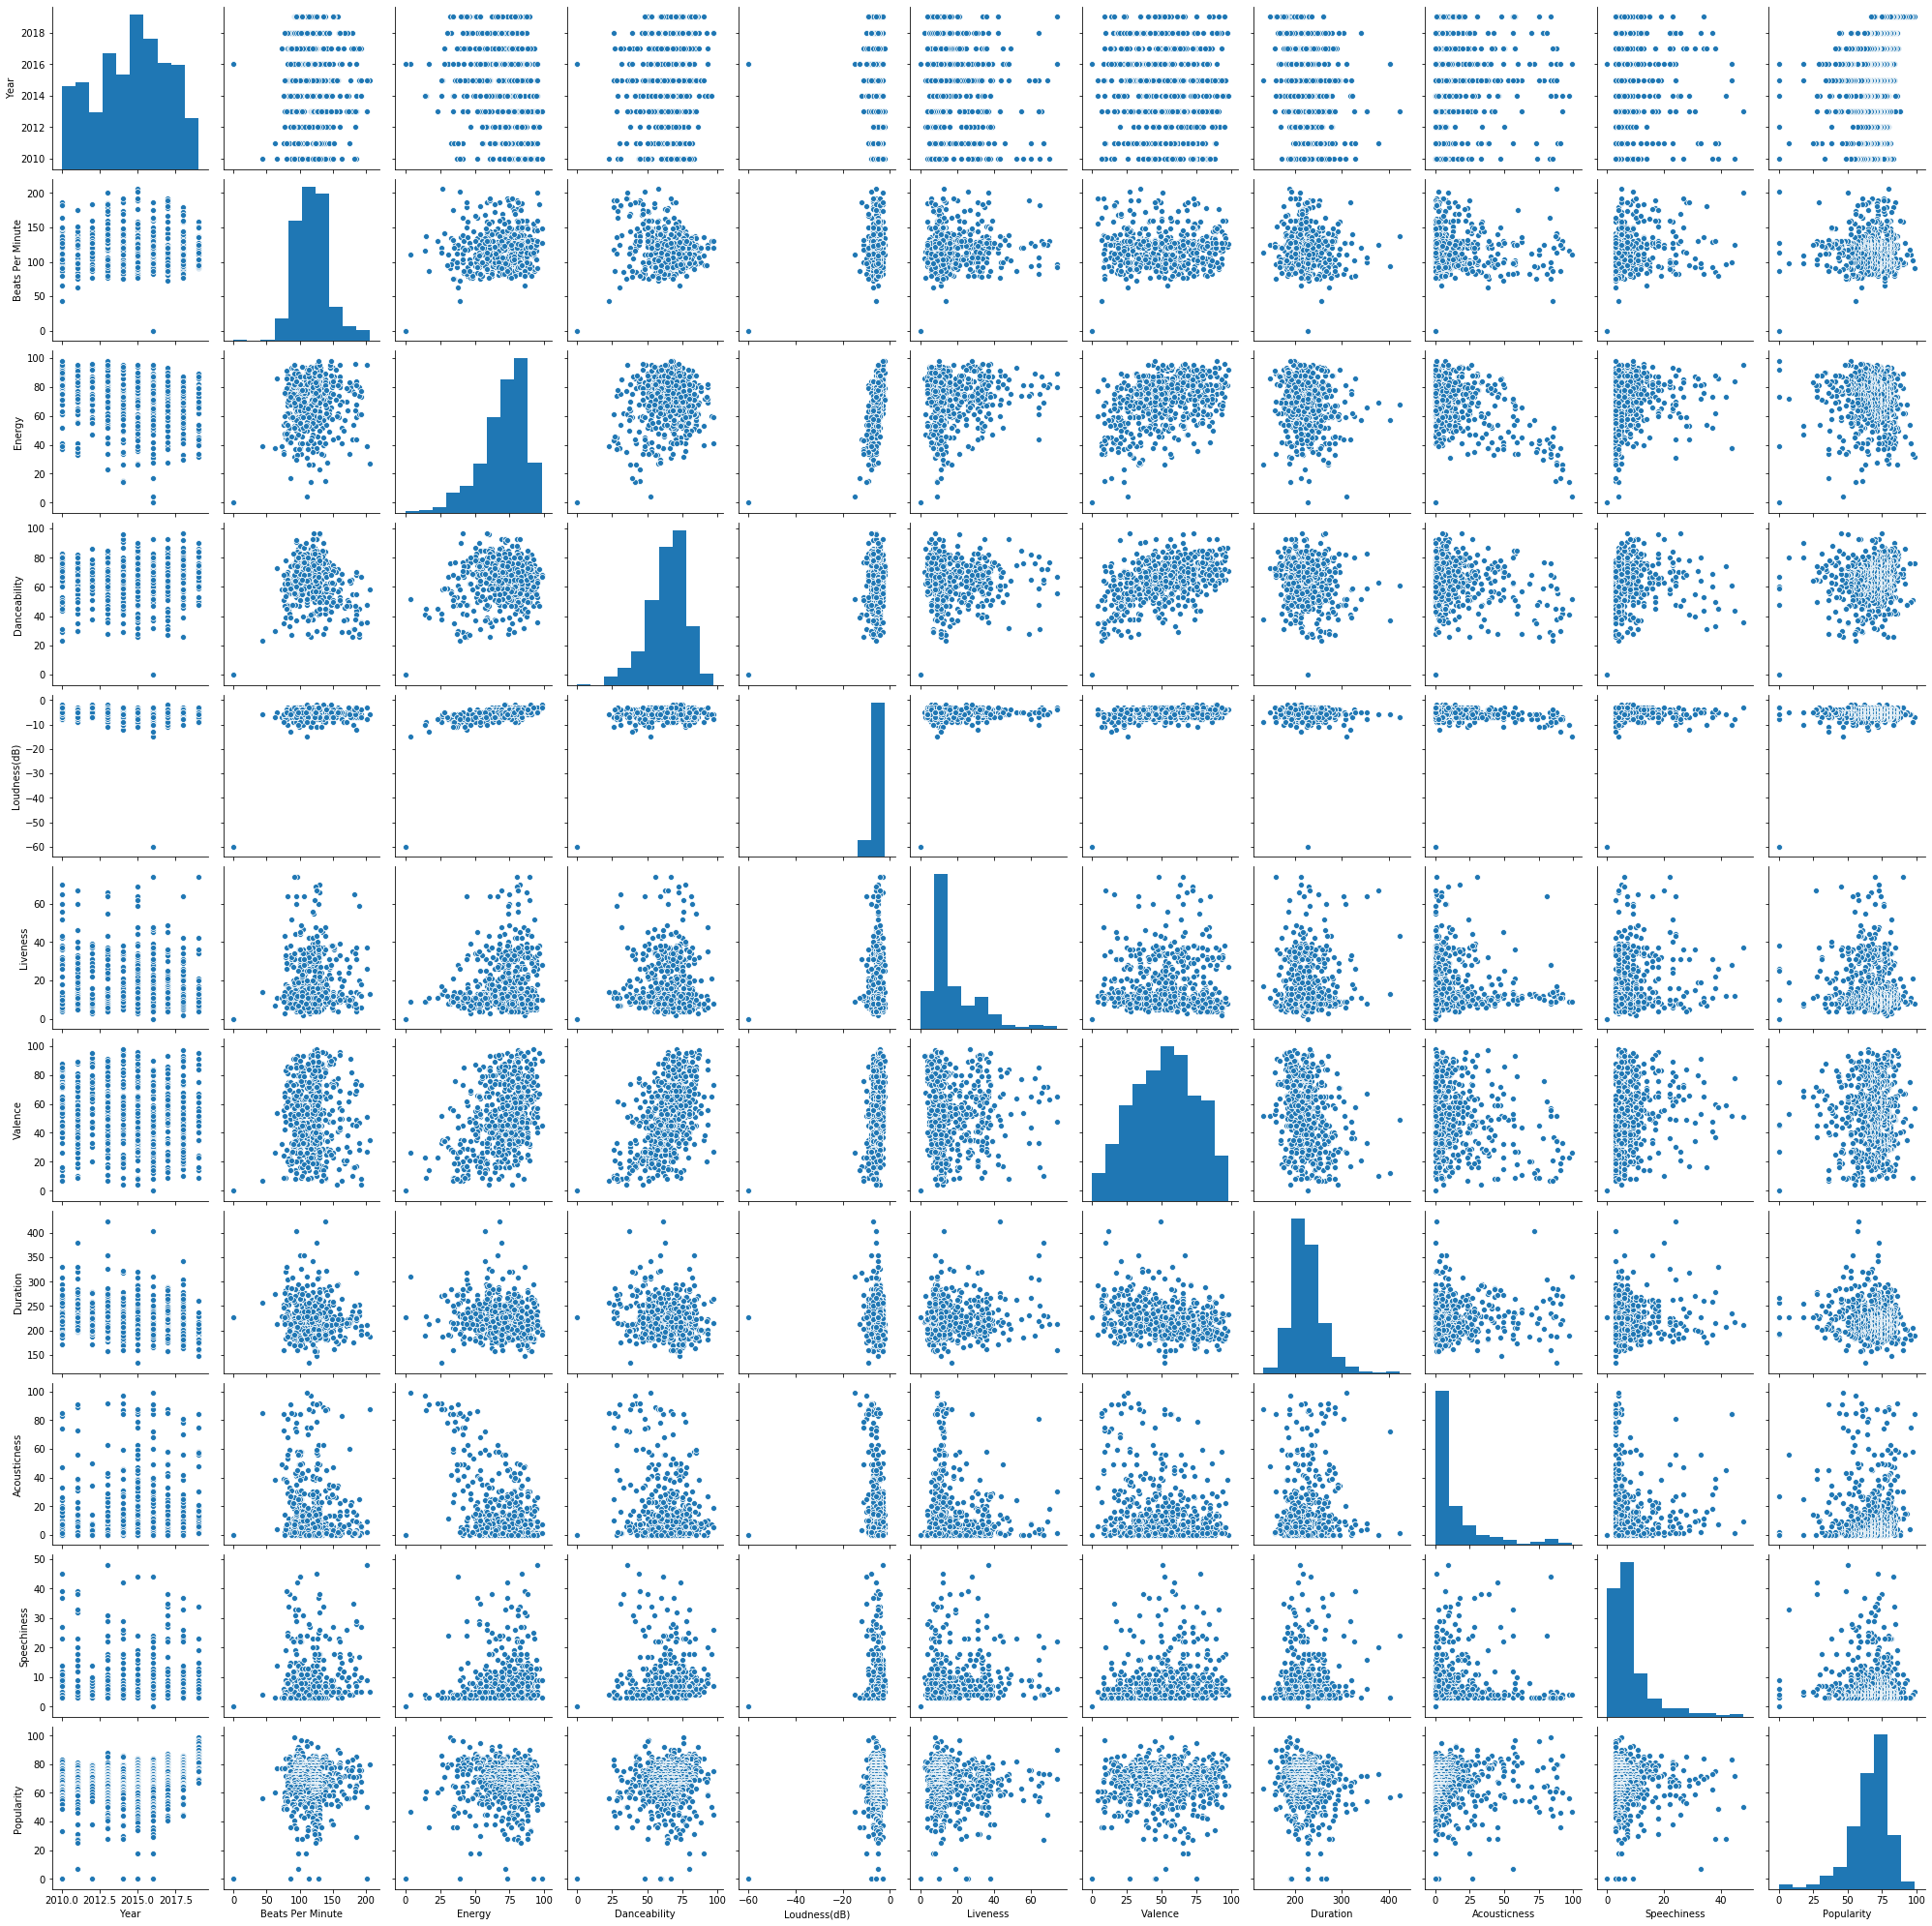

In [24]:
sns.pairplot(top.iloc[:,3:])


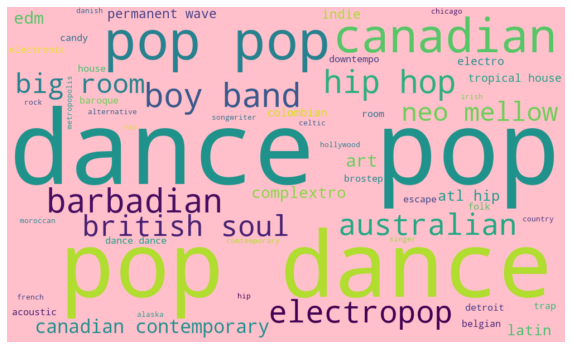

In [25]:
wordcloud = WordCloud(width = 1000, height = 600, max_font_size = 200, max_words = 300,
                      background_color='pink').generate(" ".join(top.Genre))

plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

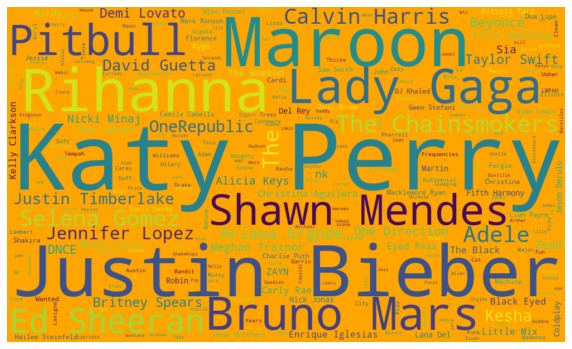

In [26]:
wordcloud = WordCloud(width = 1000, height = 600, max_font_size = 200, max_words = 300,
                      background_color='orange').generate(" ".join(top.Artist))

plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

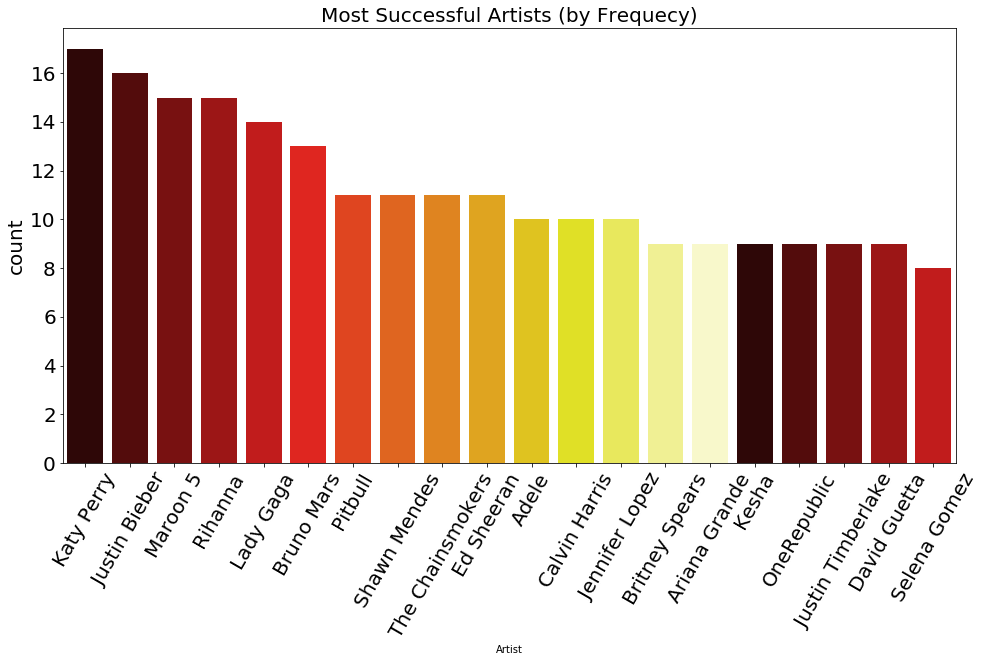

In [27]:
plt.figure(figsize=(16,8))
plt.title('Most Successful Artists (by Frequecy)',fontsize=20)
plt.xlabel('Artist', fontsize=10)
plt.ylabel('Frequency of Coming in Top Tracks of the Year', fontsize=20)

sns.countplot(top.Artist,order=pd.value_counts(top.Artist).iloc[:20].index,palette=sns.color_palette("hot", 15))

plt.xticks(size=20,rotation=60)
plt.yticks(size=20)

plt.show()

In [28]:
fig = px.scatter(top, x="Beats Per Minute", y="Valence",size='Acousticness'
                 ,color="Genre")
fig.update_layout(title_text = 'Valence against Acouticness, BPM and Genre', xaxis = dict(tickangle=0))
fig.show()


In [29]:
fig = px.box(top, x="Popularity", y="Beats Per Minute",points='all')
fig.update_layout(
    title_text = "Popularity And BPM of a Song",
    xaxis=dict(tickangle=0),
    
)
fig.show()

In [30]:
#Content based Filtering Recommendation Engine

In [15]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [23]:
top.head()

index                Title         Artist         Genre  Year  \
0      0             Memories       Maroon 5           pop  2019   
1      1  Lose You To Love Me   Selena Gomez     dance pop  2019   
2      2    Someone You Loved  Lewis Capaldi           pop  2019   
3      3             Señorita   Shawn Mendes  canadian pop  2019   
4      4    How Do You Sleep?      Sam Smith           pop  2019   

   Beats Per Minute  Energy  Danceability  Loudness(dB)  Liveness  Valence  \
0                91      32            76            -7         8       57   
1               102      34            51            -9        21        9   
2               110      41            50            -6        11       45   
3               117      54            76            -6         9       75   
4               111      68            48            -5         8       35   

   Duration  Acousticness  Speechiness  Popularity  
0       189            84            5          99  
1       206            58            4          97  
2       182            75            3          96  
3       191             4            3          95  
4       202            15            9          93

In [424]:
## Hence Cosine Similarity is a good measure

In [24]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.preprocessing import normalize
import numpy as np 

In [426]:
#final = top[['Title','Artist','Genre', 'Beats Per Minute','Valence']]

In [25]:
#final.head()

In [26]:
top['BPM Category'] = top['Beats Per Minute'].apply(lambda x: "Slow" if int(x)<85 else("Moderately Fast" if int(x)<120 else("Fast and Bright" if int(x)<=168 else 'Very Fast')))

In [27]:
top['Vibe'] = top['Valence'].apply(lambda x: "Very Sad" if int(x)<=15 else("Sad" if int(x)<50 else("Happy" if int(x)<85 else "Very Happy")))

In [28]:
top.head()

index                Title         Artist         Genre  Year  \
0      0             Memories       Maroon 5           pop  2019   
1      1  Lose You To Love Me   Selena Gomez     dance pop  2019   
2      2    Someone You Loved  Lewis Capaldi           pop  2019   
3      3             Señorita   Shawn Mendes  canadian pop  2019   
4      4    How Do You Sleep?      Sam Smith           pop  2019   

   Beats Per Minute  Energy  Danceability  Loudness(dB)  Liveness  Valence  \
0                91      32            76            -7         8       57   
1               102      34            51            -9        21        9   
2               110      41            50            -6        11       45   
3               117      54            76            -6         9       75   
4               111      68            48            -5         8       35   

   Duration  Acousticness  Speechiness  Popularity     BPM Category      Vibe  
0       189            84            5          99  Moderately Fast     Happy  
1       206            58            4          97  Moderately Fast  Very Sad  
2       182            75            3          96  Moderately Fast       Sad  
3       191             4            3          95  Moderately Fast     Happy  
4       202            15            9          93  Moderately Fast       Sad

In [29]:
features = ['Artist','Genre','BPM Category','Vibe']

In [58]:
def combine_features(row):
    return row['Vibe']+" "+row['Genre']+" "+row['BPM Category']+" "+row['Artist']

In [59]:
top["combined_features"] = top.apply(combine_features,axis=1)

In [60]:
top.head()

index                Title         Artist         Genre  Year  \
0      0             Memories       Maroon 5           pop  2019   
1      1  Lose You To Love Me   Selena Gomez     dance pop  2019   
2      2    Someone You Loved  Lewis Capaldi           pop  2019   
3      3             Señorita   Shawn Mendes  canadian pop  2019   
4      4    How Do You Sleep?      Sam Smith           pop  2019   

   Beats Per Minute  Energy  Danceability  Loudness(dB)  Liveness  Valence  \
0                91      32            76            -7         8       57   
1               102      34            51            -9        21        9   
2               110      41            50            -6        11       45   
3               117      54            76            -6         9       75   
4               111      68            48            -5         8       35   

   Duration  Acousticness  Speechiness  Popularity     BPM Category      Vibe  \
0       189            84            5          99  Moderately Fast     Happy   
1       206            58            4          97  Moderately Fast  Very Sad   
2       182            75            3          96  Moderately Fast       Sad   
3       191             4            3          95  Moderately Fast     Happy   
4       202            15            9          93  Moderately Fast       Sad   

                                 combined_features  
0               Happy pop Moderately Fast Maroon 5  
1  Very Sad dance pop Moderately Fast Selena Gomez  
2            Sad pop Moderately Fast Lewis Capaldi  
3  Happy canadian pop Moderately Fast Shawn Mendes  
4                Sad pop Moderately Fast Sam Smith

In [61]:
displayDF = top[['Title',"Genre","Artist","Year"]]

In [62]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(top["combined_features"])
cosine_sim = cosine_similarity(count_matrix)

In [63]:
def get_title_from_index(index):
    return top[top.index == index]["Title"].values[0]
def get_index_from_title(title):
    return top[top.Title==title]['index'].values[0]


In [64]:
def findRecommend():
    i=0
    song_like = input("Enter the name of the song you like: ")
    song_index = get_index_from_title(song_like)
    similar_songs = list(enumerate(cosine_sim[song_index]))
    sorted_similar_songs = sorted(similar_songs,key = lambda x:x[1],reverse=True)
    print("----------------------WELCOME TO SPOTIFY SONG RECOMMENDER---------------------------")
    print("Since you like:", song_like, " You must listen to: \n")
    for song in sorted_similar_songs[1:]:
        final_title = get_title_from_index(song[0])
        print(final_title)
        print(displayDF[displayDF['Title']==str(final_title)])
        i+=1
        if i>3:
            break
    return 


In [66]:
findRecommend()

Enter the name of the song you like: Someone You Loved
----------------------WELCOME TO SPOTIFY SONG RECOMMENDER---------------------------
Since you like: Someone You Loved  You must listen to: 

What Lovers Do (feat. SZA)
                         Title Genre    Artist  Year
95  What Lovers Do (feat. SZA)   pop  Maroon 5  2018
Cold (feat. Future)
                   Title Genre    Artist  Year
242  Cold (feat. Future)   pop  Maroon 5  2017
How Do You Sleep?
               Title Genre     Artist  Year
4  How Do You Sleep?   pop  Sam Smith  2019
Don't Call Me Up
               Title      Genre Artist  Year
16  Don't Call Me Up  dance pop  Mabel  2019


In [56]:
top['Title'].head(30)

0                                              Memories
1                                   Lose You To Love Me
2                                     Someone You Loved
3                                              Señorita
4                                     How Do You Sleep?
5                                Trampoline (with ZAYN)
6     South of the Border (feat. Camila Cabello & Ca...
7                                           Truth Hurts
8            Good as Hell (feat. Ariana Grande) - Remix
9                                               Happier
10                                          Higher Love
11                                  Underneath the Tree
12                                           Only Human
13                                         Shape of You
14                      Beautiful People (feat. Khalid)
15                                               Closer
16                                     Don't Call Me Up
17                                            Al